# Generative Adversarial Network
Practise for implementing a basic GAN

## Theory
- two nets fight together, generator tries to fool the discrimeter with fake examples, discrimeter net tries to figure out wheter the generator is lying
- generator loss: $-\log (D(G(z))$, maximize the score given by the discrimeter
- discriminator loss: $-[\log(D(x) + \log(1 - D(G(z))]$, maximize the probability from real samples $x$ and minimize probabilities from fake examples $G(z)$

![overview of gan](http://www.timzhangyuxuan.com/static/images/project_DCGAN/structure.png)

In [ ]:
from IPython.display import Image
Image(url='http://www.timzhangyuxuan.com/static/images/project_DCGAN/structure.png')

In [ ]:
from IPython.display import Image
Image(url='http://www.timzhangyuxuan.com/static/images/project_DCGAN/structure.png', embed=True)


## Geneate MINIST pictures with GAN
** MNIST Dataset Overview**

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

# Implementation

## Import modules

In [87]:
from __future__ import division, print_function, absolute_import

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

## Import dataset

In [88]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Hyper parameters

In [89]:
num_steps = 70000

batch_size = 128
learning_rate = 2e-4

image_dim = 28*28
gen_hidden_dim = 256
disc_hidden_dim = 256
input_z = 100 # input of generator

def init_weight(shape):
    return tf.random_normal(shape=shape, stddev = 1. / tf.sqrt(shape[0] / 2.0) )

In [90]:
# Weights
weights = {'gen_hidden1':tf.Variable(init_weight([input_z, gen_hidden_dim])),
           'gen_out':tf.Variable(init_weight([gen_hidden_dim, image_dim])),
           'disc_hidden1':tf.Variable(init_weight([image_dim, disc_hidden_dim])),
           'disc_out':tf.Variable(init_weight([disc_hidden_dim, 1]))
          }

bias = {'gen_hidden1':tf.Variable(tf.zeros([gen_hidden_dim])),
        'gen_out':tf.Variable(tf.zeros([image_dim])),
        'disc_hidden1':tf.Variable(tf.zeros([disc_hidder_dim])),
        'disc_out':tf.Variable(tf.zeros([1]))
       }

gen_input = tf.placeholder(tf.float32, [None, input_z], name='gen_input')
disc_input = tf.placeholder(tf.float32, [None, image_dim], name='disc_input')

gen_var_list = [weights['gen_hidden1'], bias['gen_hidden1'], weights['gen_out'], bias['gen_out']]
disc_var_list = [weights['disc_hidden1'], bias['disc_hidden1'], weights['disc_out'], bias['disc_out']]

## Network architecture

In [91]:
def generator(x):
    hidden_layer = tf.matmul(x, weights['gen_hidden1'])
    hidden_layer = tf.add(hidden_layer, bias['gen_hidden1'])
    hidden_layer = tf.nn.relu(hidden_layer)
    out_layer = tf.matmul(hidden_layer, weights['gen_out'])
    out_layer = tf.add(out_layer, bias['gen_out'])
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer
    
    
def discriminator(disc_input):
    hidden_layer = tf.matmul(disc_input, weights['disc_hidden1'])
    hidden_layer = tf.add(hidden_layer, bias['disc_hidden1'])
    hidden_layer = tf.nn.relu(hidden_layer)
    out_layer = tf.matmul(hidden_layer, weights['disc_out'])
    out_layer = tf.add(out_layer, bias['disc_out'])
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer

## Construct model

In [92]:
gen_out = generator(gen_input)
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_out)

## Loss

In [93]:
gen_loss = -tf.reduce_mean(tf.log(disc_fake))
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))

# Optimizer
gen_opt = tf.train.AdadeltaOptimizer(
    learning_rate).minimize(gen_loss, var_list=gen_var_list)
disc_opt = tf.train.AdamOptimizer(learning_rate).minimize(
    disc_loss, var_list=disc_var_list)

## Training

In [94]:
init = tf.global_variables_initializer()
loss_array = []
sess = tf.Session()

sess.run(init)
for step in range(1, num_steps+1):
    batch_x, _ = mnist.train.next_batch(batch_size)
    z = np.random.uniform(-1., 1., size=[batch_size, input_z])

    _, _, g_loss, d_loss = sess.run([gen_opt, disc_opt, gen_loss, disc_loss], feed_dict={
                                    gen_input: z, disc_input: batch_x})
    
    if step % 10 == 0 or step== 1:
        loss_array.append([step, g_loss, d_loss])

    if step % 2000 == 0 or step == 1:
        print ("step:{}, generator loss:{}, discriminator loss:{}".format(step, g_loss, d_loss))

step:1, generator loss:0.806419968605, discriminator loss:1.29653072357
step:2000, generator loss:12.0011606216, discriminator loss:5.15001047461e-05
step:4000, generator loss:13.5417613983, discriminator loss:1.07495052362e-05
step:6000, generator loss:14.7680587769, discriminator loss:1.66337861174e-06
step:8000, generator loss:15.8804483414, discriminator loss:5.07573304276e-07
step:10000, generator loss:16.8833255768, discriminator loss:1.54699262112e-06
step:12000, generator loss:18.1919212341, discriminator loss:1.67638063431e-08
step:14000, generator loss:19.2812194824, discriminator loss:1.21071979109e-08
step:16000, generator loss:20.5366897583, discriminator loss:3.25962901115e-09
step:18000, generator loss:22.1089324951, discriminator loss:-0.0
step:20000, generator loss:23.657793045, discriminator loss:2.32830945635e-08
step:22000, generator loss:25.525554657, discriminator loss:1.39698386192e-09
step:24000, generator loss:28.5018596649, discriminator loss:-0.0
step:26000, 

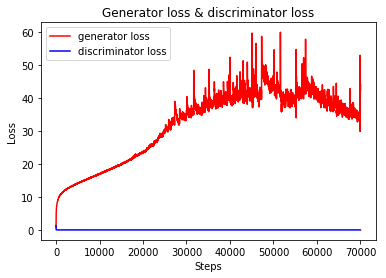

In [95]:
# plot
loss = np.array(loss_array)

plt.plot(loss[:,0], loss[:,1],'r', loss[:,0], loss[:,2], 'b')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Generator loss & discriminator loss')
plt.legend(('generator loss', 'discriminator loss'))
plt.show()

## Test

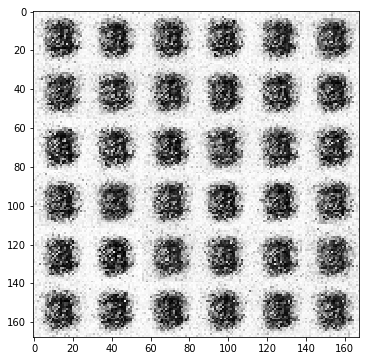

In [96]:
# Testing
# Generate images from noise, using the generator network.
n = 6
canvas = np.empty((28 * n, 28 * n))
for i in range(n):
    # Noise input.
    z = np.random.uniform(-1., 1., size=[n, input_z])
    # Generate image from noise.
    g = sess.run(gen_out, feed_dict={gen_input: z})
    # Reverse colours for better display
    g = -1 * (g - 1)
    for j in range(n):
        # Draw the generated digits
        canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

plt.figure(figsize=(n, n))
plt.imshow(canvas, origin="upper", cmap="gray")
plt.show()